<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/unsupervised/04_anomaly_detection/05_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### prophet
Strona biblioteki: [https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)  

Dokumentacja/User Guide: [https://facebook.github.io/prophet/docs/quick_start.html](https://facebook.github.io/prophet/docs/quick_start.html)

Biblioteka do pracy z szeregami czasowymi od Facebook'a

Aby zainstalować bibliotekę prophet, użyj polecenia poniżej:
```
!pip install fbprophet
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade fbprophet
```
Kurs stworzony w oparciu o wersję `0.5`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [1]:
import fbprophet
import pandas as pd
import plotly.express as px

fbprophet.__version__

'0.5'

Danymi wejściowymi do klasy Prophet jest zawsze obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn: 
* ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
* y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)


[Plotly color scales](https://plot.ly/python/builtin-colorscales/)

Wiki data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
data = df.copy()
data.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
data.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [4]:
from fbprophet import Prophet

model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [5]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper
0,2007-12-10,1.349221,8.802711,7.669660,10.055216
1,2007-12-11,1.349148,8.554691,7.358461,9.840717
2,2007-12-12,1.349076,8.354953,7.129508,9.417862
3,2007-12-13,1.349003,8.332300,7.098871,9.498307
4,2007-12-14,1.348931,8.320971,7.280690,9.547339


In [6]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,real,anomaly
0,2007-12-10,1.349221,7.669660,10.055216,1.349221,1.349221,4.917132,4.917132,4.917132,5.524291,5.524291,5.524291,0.256148,0.256148,0.256148,0.351011,0.351011,0.351011,0.0,0.0,0.0,8.802711,9.590761,1
1,2007-12-11,1.349148,7.358461,9.840717,1.349148,1.349148,4.917132,4.917132,4.917132,5.340808,5.340808,5.340808,0.086128,0.086128,0.086128,0.337547,0.337547,0.337547,0.0,0.0,0.0,8.554691,8.519590,1
2,2007-12-12,1.349076,7.129508,9.417862,1.349076,1.349076,4.917132,4.917132,4.917132,5.193094,5.193094,5.193094,-0.048793,-0.048793,-0.048793,0.324754,0.324754,0.324754,0.0,0.0,0.0,8.354953,8.183677,1
3,2007-12-13,1.349003,7.098871,9.498307,1.349003,1.349003,4.917132,4.917132,4.917132,5.176634,5.176634,5.176634,-0.053456,-0.053456,-0.053456,0.312958,0.312958,0.312958,0.0,0.0,0.0,8.332300,8.072467,1
4,2007-12-14,1.348931,7.280690,9.547339,1.348931,1.348931,4.917132,4.917132,4.917132,5.168568,5.168568,5.168568,-0.051018,-0.051018,-0.051018,0.302454,0.302454,0.302454,0.0,0.0,0.0,8.320971,7.893572,1


In [7]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - Wiki', template='plotly_dark', width=900, height=500)

In [8]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [9]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.802711,7.580458,10.037809
1,2007-12-11,8.554691,7.399075,9.782763
2,2007-12-12,8.354953,7.087977,9.502483
3,2007-12-13,8.332300,7.195397,9.454583
4,2007-12-14,8.320971,7.081237,9.491746


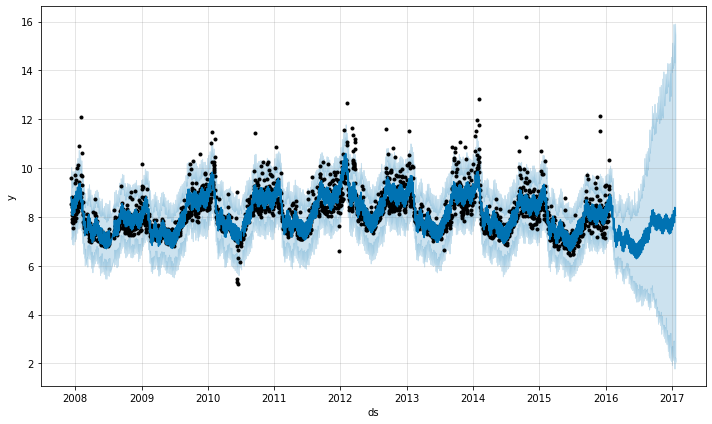

In [10]:
_ = model.plot(forecast)

In [11]:
forecast = model.predict(future)
forecast[['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,trend_lower,trend_upper,yhat,yhat_lower,yhat_upper
0,2007-12-10,1.349221,1.349221,1.349221,8.802711,7.701789,9.965708
1,2007-12-11,1.349148,1.349148,1.349148,8.554691,7.431047,9.846243
2,2007-12-12,1.349076,1.349076,1.349076,8.354953,7.168639,9.549559
3,2007-12-13,1.349003,1.349003,1.349003,8.332300,6.979615,9.486532
4,2007-12-14,1.348931,1.348931,1.348931,8.320971,7.046368,9.527544


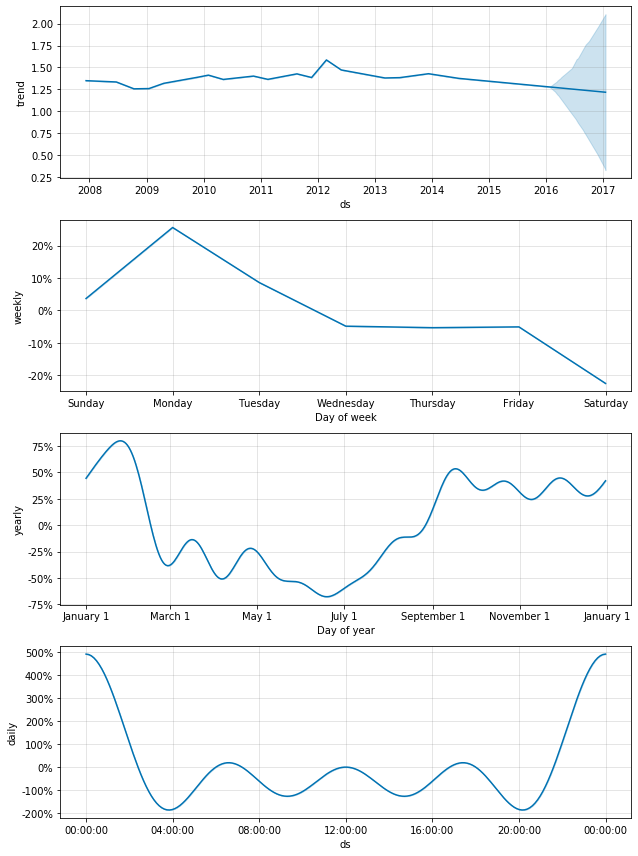

In [12]:
_ = model.plot_components(forecast)

In [14]:
from fbprophet.plot import plot_plotly

plot_plotly(model, forecast)